In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
def is_connected(graph):
    visited = {node: False for node in graph}
    stack = [list(graph.keys())[0]]
    while stack:
        node = stack.pop()
        if not visited[node]:
            visited[node] = True
            for neighbor in graph[node]:
                stack.append(neighbor)
    return all(visited.values())


def node_connectivity(graph):
    min_connectivity = float('inf')
    for node in graph:
        temp_graph = {key: value[:] for key, value in graph.items()}
        del temp_graph[node]
        for key in temp_graph:
            if node in temp_graph[key]:
                temp_graph[key].remove(node)
        if not is_connected(temp_graph):
            min_connectivity = min(min_connectivity, 1)
    return min_connectivity if min_connectivity != float('inf') else 0


graph = {
    "A": ["B", "C", "F"],
    "B": ["A", "C", "D", "E"],
    "C": ["A", "B", "F", "E"],
    "D": ["B", "E"],
    "E": ["H", "D", "F", "G"],
    "F": ["A", "E", "C"],
    "G": ["E", "H", "M", "M1"],
    "H": ["E", "G", "M", "N"],
    "M": ["H", "G", "M1"],
    "N": ["H", "M1"],
    "M1": ["M", "N", "G"]
}

print("Node connectivity of the network:", node_connectivity(graph))

Node connectivity of the network: 1


In [3]:
edges = [
    ("A", "B"), ("A", "C"),
    ("B", "D"), ("B", "E"),
    ("C", "F"), ("C", "G"),
    ("D", "H"), ("D", "A"),
    ("E", "H"),
    ("F", "A"),
    ("G", "A")]

G = nx.Graph()
G.add_edges_from(edges)

pagerank = nx.pagerank(G)
sorted_nodes = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)

print("Nodes sorted in descending order of their PageRank values:")
for node, pr in sorted_nodes:
    print(node, ":", pr)

max_pagerank_node = max(pagerank, key=pagerank.get)
print("\nNode with the highest PageRank value:", max_pagerank_node)

Nodes sorted in descending order of their PageRank values:
A : 0.21199246438661368
B : 0.13533466431919466
D : 0.13533466431919466
C : 0.1335127127808926
E : 0.09929622673664733
H : 0.09929622673664733
F : 0.09261652036040485
G : 0.09261652036040485

Node with the highest PageRank value: A


In [4]:
def local_clustering_coefficient(graph, node):
    neighbors = list(graph.neighbors(node))
    k = len(neighbors)
    if k < 2:
        return 0.0
    total_possible_edges = k * (k - 1) / 2
    edges_within_neighbors = sum(1 for v, w in graph.edges(neighbors) if w in neighbors)
    return 2.0 * edges_within_neighbors / total_possible_edges


def all_local_clustering_coefficients(graph):
    coefficients = {}
    for node in graph.nodes():
        coefficients[node] = local_clustering_coefficient(graph, node)
    return coefficients


edges = [
    ("A", "B"), ("A", "C"),
    ("A", "F"), ("A", "D"),
    ("A", "E"), ("B", "A"),
    ("B", "F"), ("B", "C"),
    ("C", "B"), ("C", "F"),
    ("C", "D"), ("C", "A"),
    ("F", "A"), ("F", "B"),
    ("F", "E"), ("F", "D"),
    ("F", "C"), ("E", "A"),
    ("E", "F"), ("E", "D"),
    ("D", "E"), ("D", "A"),
    ("D", "F"), ("D", "C")
]

G = nx.Graph()
G.add_edges_from(edges)

coefficients = all_local_clustering_coefficients(G)
for node, coefficient in coefficients.items():
    print("Local clustering coefficient for node", node, ":", coefficient)

Local clustering coefficient for node A : 1.4
Local clustering coefficient for node B : 2.0
Local clustering coefficient for node C : 1.6666666666666667
Local clustering coefficient for node F : 1.4
Local clustering coefficient for node D : 1.6666666666666667
Local clustering coefficient for node E : 2.0


In [5]:
edges = [
    ("A", "B"), ("A", "C"), ("A", "D"), ("D", "F"),
    ("C", "A"),
    ("B", "A"), ("B", "D"), ("B", "E"),
    ("E", "B"), ("E", "D"), ("E", "G"),
    ("D", "A"), ("D", "B"), ("D", "E"), ("D", "G"), ("D", "F"),
    ("F", "A"), ("F", "D"), ("F", "G"), ("F", "H"),
    ("G", "E"), ("G", "D"), ("G", "F"), ("G", "H"),
    ("H", "G"), ("H", "F"), ("H", "I"),
    ("I", "H"), ("I", "J"), ("I", "L"), ("I", "K"),
    ("J", "I"), ("J", "L"),
    ("L", "J"), ("L", "I"), ("L", "K"),
    ("K", "I"), ("K", "L")
]

G = nx.Graph()
G.add_edges_from(edges)

core_3 = nx.k_core(G, k=3)

print("Nodes belonging to the 3-core of the graph:", core_3.nodes())

Nodes belonging to the 3-core of the graph: ['A', 'B', 'D', 'F', 'E', 'G']


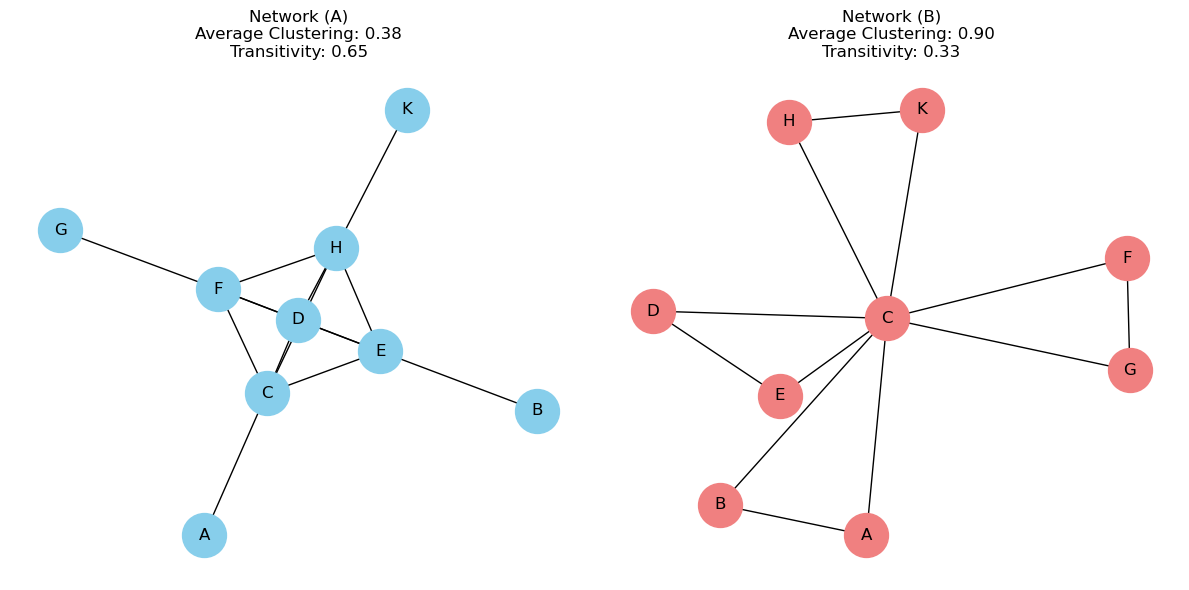

In [6]:
edges_A = [
    "AC",
    "CA", "CD", "CF", "CE", "CH",
    "DC", "DF", "DE", "DH",
    "EC", "EB", "EF", "EH",
    "BE",
    "HE", "HC", "HD", "HF", "HK",
    "KH",
    "FD", "FC", "FE", "FH", "FG",
    "GF"
]

G_A = nx.Graph()
G_A.add_edges_from(edges_A)

edges_B = [
    "AB", "AC",
    "BA", "BC",
    "CA", "CB", "CF", "CG", "CH", "CK", "CE", "CD",
    "FC",
    "GF", "GC",
    "HC", "HK",
    "KC", "KH",
    "EC", "ED",
    "DE", "DC"
]

G_B = nx.Graph()
G_B.add_edges_from(edges_B)

avg_clustering_A = nx.average_clustering(G_A)
avg_clustering_B = nx.average_clustering(G_B)
transitivity_A = nx.transitivity(G_A)
transitivity_B = nx.transitivity(G_B)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
nx.draw(G_A, with_labels=True, node_color="skyblue", node_size=1000, font_size=12)
plt.title("Network (A)\nAverage Clustering: {:.2f}\nTransitivity: {:.2f}".format(avg_clustering_A, transitivity_A))

plt.subplot(1, 2, 2)
nx.draw(G_B, with_labels=True, node_color="lightcoral", node_size=1000, font_size=12)
plt.title("Network (B)\nAverage Clustering: {:.2f}\nTransitivity: {:.2f}".format(avg_clustering_B, transitivity_B))

plt.tight_layout()
plt.show()

In [7]:
edges = [
    "AB", "AC", "AD", "AE",
    "BA", "BC", "BE",
    "DA",
    "CA", "CB", "CE",
    "EA", "EB", "EC"
]

G = nx.Graph()
G.add_edges_from(edges)

clustering_coefficients = nx.clustering(G)

avg_clustering = sum(clustering_coefficients.values()) / len(clustering_coefficients)
print("Clustering coefficient of the graph:", avg_clustering)

Clustering coefficient of the graph: 0.7
